# Trabajo Módulo 4 – Aprendizaje Profundo

## Descripción del Problema de Negocio:

En el contexto empresarial de un servicio de reconocimiento de imágenes, nos enfrentamos al desafío de desarrollar un sistema de detección de objetos en imágenes utilizando el conjunto de datos CIFAR-10 proporcionado por Keras. Este problema tiene aplicaciones prácticas en diversas industrias, como la automotriz, la de seguridad, la de retail y la de atención médica.

Imaginemos una empresa dedicada a la gestión de inventarios en el sector retail. En este caso, el problema de negocio es mejorar la precisión y eficiencia del sistema de monitoreo de inventarios mediante la identificación y clasificación automática de productos en las estanterías. Esto es crucial para optimizar la reposición de stock, reducir pérdidas por errores humanos y mejorar la experiencia de compra de los clientes.

## Propuesta de Solución:

* Definición del Modelo: Proponemos crear un modelo predictivo utilizando redes neuronales convolucionales (CNN) para identificar objetos en imágenes. Las CNN son particularmente eficaces en tareas de visión por computadora debido a su capacidad para detectar y aprender patrones complejos en datos visuales.

* Arquitectura del Modelo: La estructura de la CNN se diseñará para extraer características distintivas de los objetos en las imágenes. Emplearemos capas convolucionales para la extracción de características y capas densamente conectadas para el aprendizaje de patrones jerárquicos. La configuración del modelo será determinada según la complejidad del problema y la cantidad de datos disponibles.

* Preprocesamiento de Datos: Antes de alimentar los datos al modelo, realizaremos un preprocesamiento completo. Esto incluirá la normalización de los valores de los píxeles, técnicas de aumento de datos para evitar el sobreajuste y la segmentación de objetos para proporcionar información contextual adicional.

* Conjunto de Datos: Utilizaremos el conjunto de datos CIFAR-10 para entrenar y validar el modelo. Este conjunto consta de 60,000 imágenes en color de 32x32 píxeles, divididas en 10 categorías diferentes de objetos, lo cual es adecuado para nuestro problema de detección de objetos.

* Entrenamiento y Validación del Modelo: Entrenaremos el modelo usando el conjunto de datos CIFAR-10, dividiéndolo en subconjuntos de entrenamiento y validación. Durante el proceso de entrenamiento, el modelo ajustará sus pesos para aprender a reconocer patrones específicos asociados con objetos en las imágenes.

* Evaluación del Modelo: Evaluaremos la efectividad del modelo mediante métricas de rendimiento como precisión, recall y F1-score en el conjunto de validación. Además, realizaremos validación cruzada y ajuste fino del modelo para asegurar su robustez y capacidad de generalización.

Este enfoque detallado asegurará que el modelo no solo sea entrenado adecuadamente, sino que también funcione eficazmente en entornos de producción, proporcionando resultados precisos y confiables en la detección de objetos en imágenes.

## IMPORTE DE LIBRERIAS Y CARGA DE DATA

In [ ]:
# Para asegurar la actualización de que TensorFlow
#!pip install --upgrade tensorflow

In [3]:
# Importación de bibliotecas estándar de Python
import numpy as np
import matplotlib.pyplot as plt

# Importación de bibliotecas de Keras y TensorFlow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Importación de módulos específicos de Keras
from keras.datasets import cifar10
from keras import models, layers, optimizers, regularizers
from keras.utils import to_categorical

# Importación de bibliotecas de Scikit-learn
from sklearn.model_selection import GridSearchCV

In [4]:
## Carga de datos
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

## Dimensiones de los conjuntos de datos
print("Datos de entrenamiento:", train_data.shape)
print("Etiquetas de entrenamiento:", train_labels.shape)
print("Datos de prueba:", test_data.shape)
print("Etiquetas de prueba:", test_labels.shape)

Datos de entrenamiento: (50000, 32, 32, 3)
Etiquetas de entrenamiento: (50000, 1)
Datos de prueba: (10000, 32, 32, 3)
Etiquetas de prueba: (10000, 1)


## Limpieza y transformación

In [5]:
### Estandarización de los datos
# Valores entre 0 y 1
train_data = train_data / 255.0
test_data = test_data / 255.0

## Ajuste de las RN

### Visualización de las ultimas 20 imágenes

In [6]:
## Lista de nombres de las 10 clases del conjunto de datos CIFAR-10. 
class_names = ['avión', 'automóvil', 'ave', 'gato', 'ciervo',
               'perro', 'sapo', 'caballo', 'barco', 'tractor']

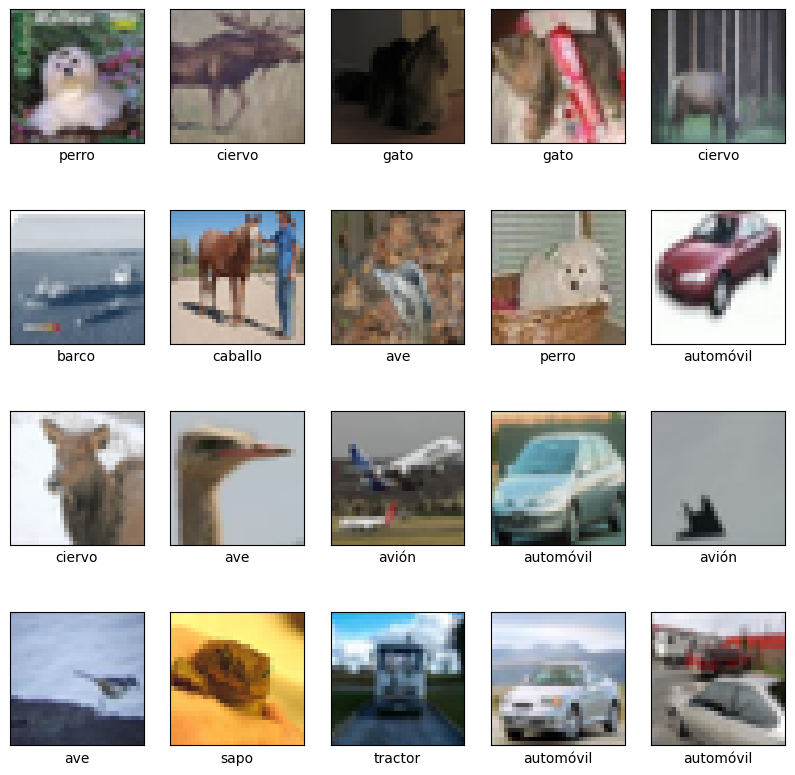

In [39]:

# Visualizando las últimas 20 imágenes en el dataset de entrenamiento
plt.figure(figsize=[10,10])
for i in range(20):  # para las últimas 20 imágenes
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[-20 + i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[-20 + i][0]])

plt.show()

### Preprocesamiento

In [7]:
## Reorganización de los datos train
x_train = train_data.reshape((50000,32*32*3))
## Convierten los datos de enteros a flotantes
x_train = x_train.astype('float32')/255 # normaliza los valores de los píxeles entre 0 y 1

## Reorganización de los datos test
x_test = test_data.reshape((10000,32*32*3))
## Convierten los datos de enteros a flotantes
x_test = x_test.astype('float32')/255 # normaliza los valores de los píxeles entre 0 y 1

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [8]:
## Conversion a representación binaria
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [9]:
print(train_labels[-1])
print(y_train[-1])

[1]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Creación de la red neuronal - Sin Regularización

In [13]:
ann1 = models.Sequential()
ann1.add(layers.Dense(516,activation='relu',input_shape=(32*32*3,)))
ann1.add(layers.Dense(128,activation='relu',input_shape=(32*32*3,)))
ann1.add(layers.Dense(64,activation='relu'))
ann1.add(layers.Dense(32,activation='relu',))
ann1.add(layers.Dense(10,activation='softmax'))

# Resumen del modelo
ann1.summary()

c:\Users\jfeli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 516)            │     1,585,668 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        66,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,510 (6.34 MB)

 Trainable params: 1,662,510 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento de red neuronal

In [14]:
ann1.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]
#y_val = train_labels[:5000]
#partial_y_train = train_labels[5000:]

In [45]:
### Entrenamiento de la ANN1
history1 = ann1.fit(partial_x_train, partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.1344 - loss: 2.2288 - val_accuracy: 0.2378 - val_loss: 1.9885
Epoch 2/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.2495 - loss: 1.9727 - val_accuracy: 0.2820 - val_loss: 1.9118
Epoch 3/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.2916 - loss: 1.9138 - val_accuracy: 0.3156 - val_loss: 1.8682
Epoch 4/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3133 - loss: 1.8773 - val_accuracy: 0.3274 - val_loss: 1.8427
Epoch 5/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3334 - loss: 1.8347 - val_accuracy: 0.3466 - val_loss: 1.7997
Epoch 6/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3454 - loss: 1.8020 - val_accuracy: 0.3540 - val_loss: 1.7693
Epoch 7/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3582 - loss: 1.7629 - val_accuracy: 0.3672 - val_loss: 1.7390
Epoch 8/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3728 - loss: 1.7298 - val_accuracy: 0.3794 - v

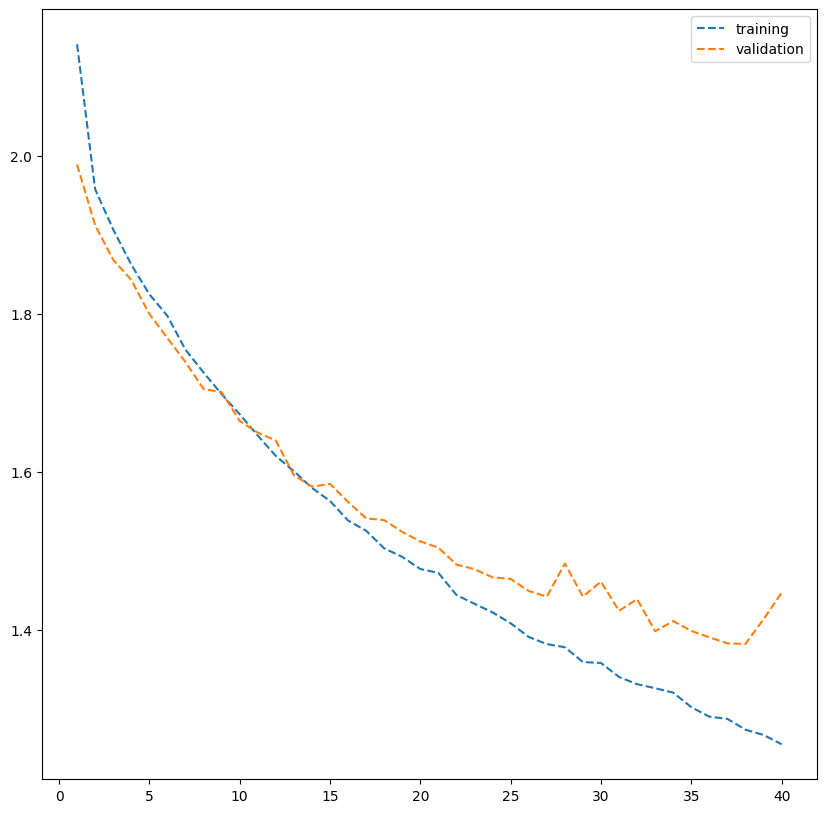

In [46]:
# visualizar la pérdida durante el entrenamiento y validación
history_dict1 = history1.history
loss_values = history_dict1['loss']
val_loss_values = history_dict1['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, '--', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

## Creación de la red neuronal - Con Regularización

In [15]:
## Construcción del modelo incluye definición de hiperparametros

model = models.Sequential()
model.add(layers.Dense(516,activation='relu',input_shape=(32*32*3,),
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(128,activation='relu',input_shape=(32*32*3,),
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(10,activation='softmax'))

# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 516)            │     1,585,668 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        66,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,510 (6.34 MB)

 Trainable params: 1,662,510 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento de red neuronal

In [16]:
model.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]
#y_val = train_labels[:5000]
#partial_y_train = train_labels[5000:]

In [17]:
### Entrenamiento de model
history2 = model.fit(partial_x_train, partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.1674 - loss: 2.3020 - val_accuracy: 0.2608 - val_loss: 2.0403
Epoch 2/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.2701 - loss: 2.0224 - val_accuracy: 0.3146 - val_loss: 1.9406
Epoch 3/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3074 - loss: 1.9464 - val_accuracy: 0.3282 - val_loss: 1.8959
Epoch 4/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3227 - loss: 1.9095 - val_accuracy: 0.3314 - val_loss: 1.8629
Epoch 5/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3340 - loss: 1.8776 - val_accuracy: 0.3478 - val_loss: 1.8319
Epoch 6/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3439 - loss: 1.8473 - val_accuracy: 0.3542 - val_loss: 1.8135
Epoch 7/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3490 - loss: 1.8325 - val_accuracy: 0.3474 - val_loss: 1.8062
Epoch 8/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3606 - loss: 1.8083 - val_accuracy: 0.3484 - v

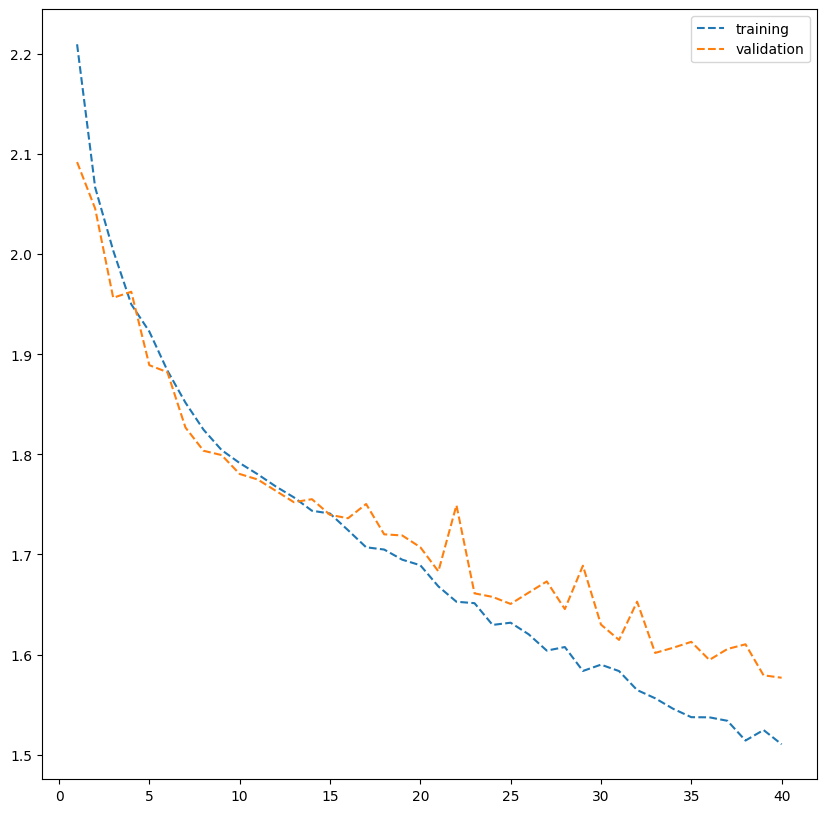

In [52]:
# visualizar la pérdida durante el entrenamiento y validación
history_dict2 = history2.history
loss_values = history_dict2['loss']
val_loss_values = history_dict2['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, '--', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

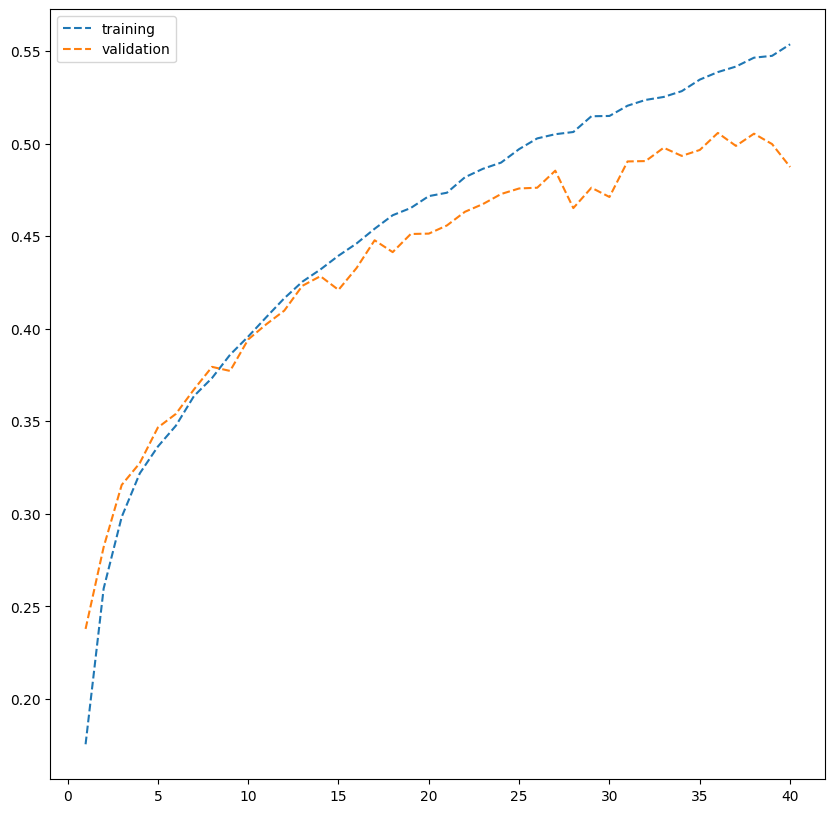

In [53]:
# accuracy
history_dict = history1.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(accuracy)+1)
plt.plot(epoch, accuracy, '--', label = 'training')
plt.plot(epoch, val_accuracy, '--', label = 'validation')
plt.legend()
plt.show()

In [35]:
## Evaluación de la red
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4847 - loss: 1.5376


[1.541792392730713, 0.47780001163482666]

## PREDICCIONES

In [19]:
# Predecir
y_predict = model.predict(x_test)

# Convirtiendo las predicciones en etiquetas de cada clase
y_predict_classes = np.argmax(y_predict, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


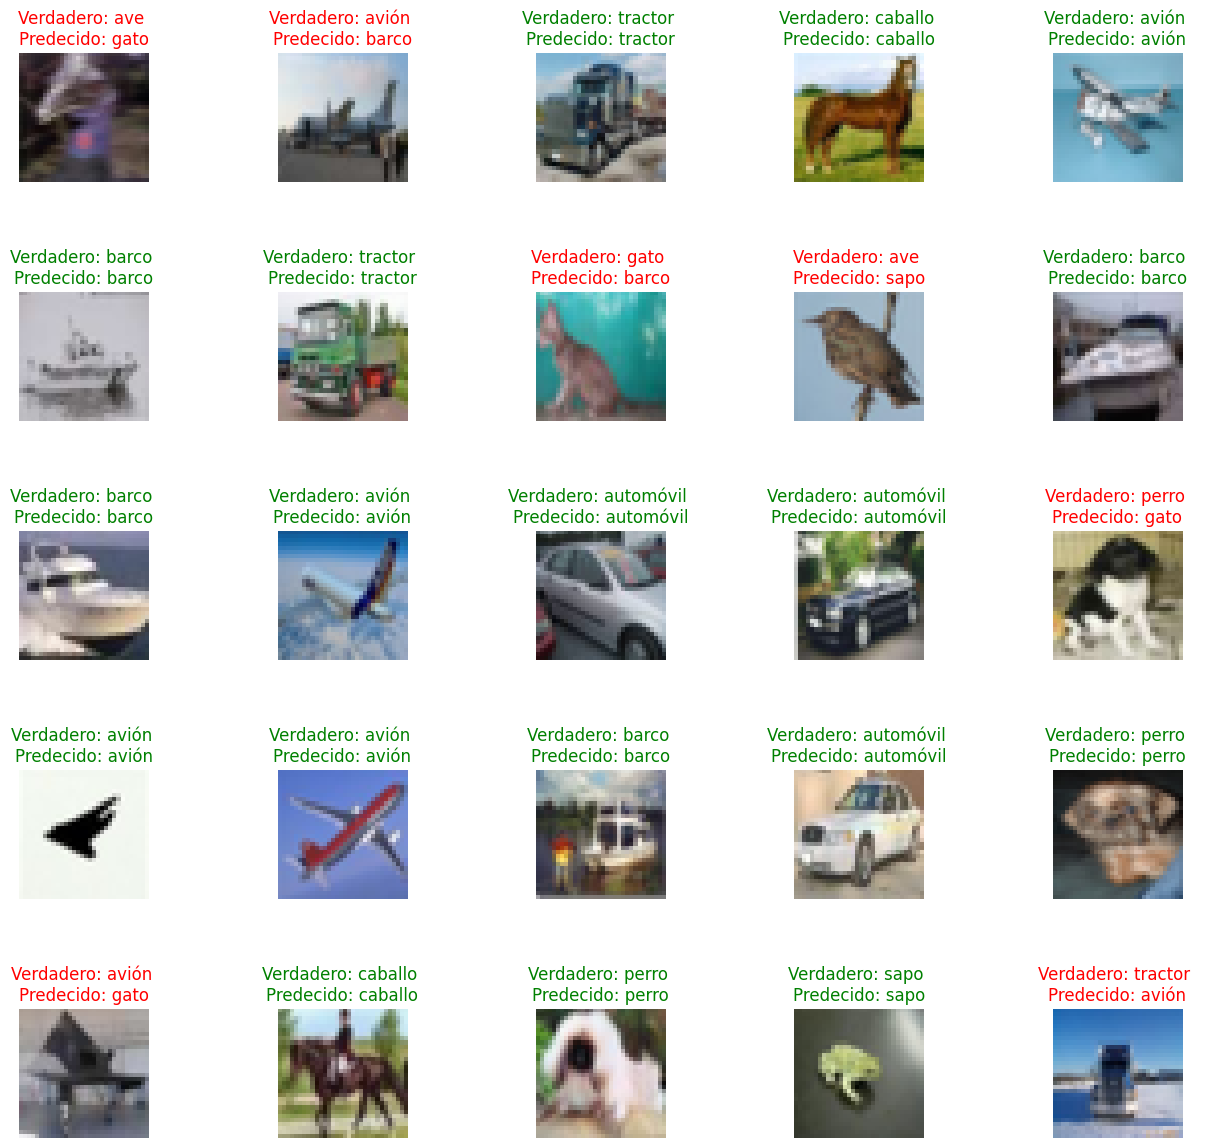

In [40]:
# Graficando Clase real vs. Clase predecidas

import random

# Definir cuántas imágenes quieres mostrar de forma aleatoria
num_images = 25

# Generar índices aleatorios
random_indices = random.sample(range(len(test_data)), num_images)

# Crear el gráfico
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i, index in enumerate(random_indices):
    axes[i].imshow(test_data[index])
    title_color = "green" if np.argmax(y_test[index]) == y_predict_classes[index] else "red"
    axes[i].set_title("Verdadero: %s \nPredecido: %s" % (class_names[np.argmax(y_test[index])], class_names[y_predict_classes[index]]), color=title_color)
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

plt.show()

In [60]:
### Listado de toda la data almacenada en 'history'
print(history2.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


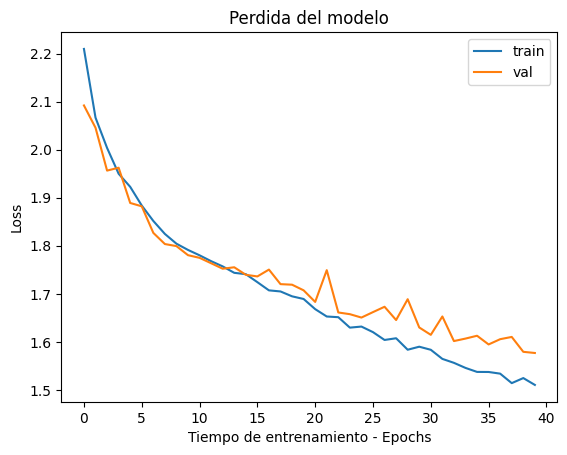

In [61]:
### Visualización de las curvas de error
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

### Análisis función de pérdida

Aquí se presenta un gráfico que contrasta las curvas de pérdida durante el proceso de entrenamiento y validación a lo largo de las épocas. Esta representación resulta valiosa para evaluar si el modelo experimenta sobreajuste (overfitting) o subajuste (underfitting), ya que proporciona una visión clara de cómo la pérdida evoluciona en ambos conjuntos de datos a medida que avanza el proceso de entrenamiento. En esta instancia, la pérdida tiende a aumentar después de Epochs 15; no obstante, este incremento no se considera que impacte negativamente en el desempeño general del modelo.

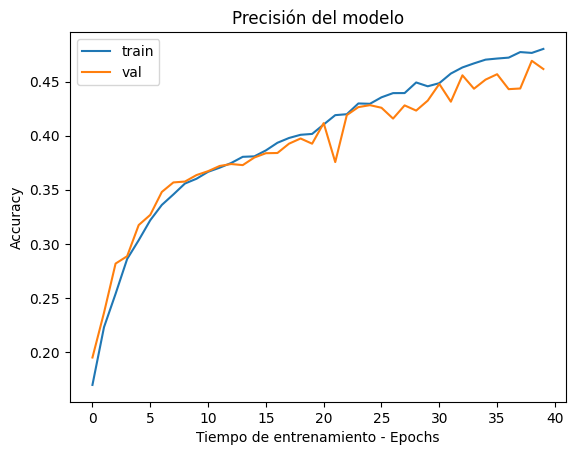

In [62]:
### Visualización de las curvas de error
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()

### Análisis sobre la precisión

Aquí se crea un gráfico que contrasta las curvas de precisión durante el proceso de entrenamiento y validación a lo largo del tiempo de entrenamiento - Epochs. La precisión es una métrica fundamental para evaluar el rendimiento de un modelo de clasificación. Analizar estas curvas facilita la identificación de mejoras en la capacidad predictiva del modelo, así como la detección de posibles problemas de sobreajuste o subajuste. En esta representación, se nota que la precisión se mantiene relativamente constante entre el epochs 16 y 18, sugiriendo una estabilidad en el rendimiento del modelo en ese intervalo de entrenamiento.

## Ajuste del modelo de Shallow Learning:

In [33]:
## Importe librerias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [37]:
# Aplanar las imágenes para que puedan ser alimentadas al modelo de Shallow Learning
x_train_flat = x_train.reshape((50000, 32*32*3))
x_test_flat = x_test.reshape((10000, 32*32*3))

# Crear y ajustar el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=142)
logistic_model.fit(x_train_flat, train_labels.flatten())

# Predecir en el conjunto de prueba
y_pred = logistic_model.predict(x_test_flat)

# Evaluar el rendimiento del modelo de Shallow Learning
accuracy = accuracy_score(test_labels.flatten(), y_pred)
classification_rep = classification_report(test_labels.flatten(), y_pred, target_names=class_names)

print(f'Accuracy del modelo de Shallow Learning: {accuracy}')
print('\nClassification Report del modelo de Shallow Learning:\n', classification_rep)

Accuracy del modelo de Shallow Learning: 0.1

Classification Report del modelo de Shallow Learning:
               precision    recall  f1-score   support

       avión       0.10      1.00      0.18      1000
   automóvil       0.00      0.00      0.00      1000
         ave       0.00      0.00      0.00      1000
        gato       0.00      0.00      0.00      1000
      ciervo       0.00      0.00      0.00      1000
       perro       0.00      0.00      0.00      1000
        sapo       0.00      0.00      0.00      1000
     caballo       0.00      0.00      0.00      1000
       barco       0.00      0.00      0.00      1000
     tractor       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



c:\Users\jfeli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jfeli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jfeli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [38]:
# Evaluar el rendimiento del modelo de Shallow Learning
accuracy = accuracy_score(test_labels.flatten(), y_predict_classes)
classification_rep = classification_report(test_labels, y_predict_classes, target_names=class_names)
print(f'Accuracy del modelo con regularizacion: {accuracy}')
print('\nClassification Report del modelo con regularizacion:\n', classification_rep)

Accuracy del modelo con regularizacion: 0.4778

Classification Report del modelo con regularizacion:
               precision    recall  f1-score   support

       avión       0.52      0.55      0.54      1000
   automóvil       0.61      0.59      0.60      1000
         ave       0.34      0.33      0.33      1000
        gato       0.34      0.32      0.33      1000
      ciervo       0.41      0.30      0.35      1000
       perro       0.42      0.38      0.40      1000
        sapo       0.45      0.68      0.54      1000
     caballo       0.66      0.48      0.55      1000
       barco       0.48      0.76      0.59      1000
     tractor       0.64      0.40      0.49      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



Modelo con regularizacion: accuracy: 0.4778

Modelo de Shallow Learning: 0.1

En términos generales, el modelo con regularización tiene un rendimiento superior en términos de precisión en comparación con el modelo de Shallow Learning. Un mayor valor de precisión indica que el modelo con regularización ha clasificado correctamente una mayor proporción de ejemplos en comparación con el modelo de Shallow Learning.

## CONCLUSIONES

* Dado que el modelo desarrollado identifica con precisión las imagenes cuando se ejecutan de manera aleatoria "Graficando Clase real vs. Clase predecidas", se puede concluir que ha tenido éxito en la detección de objetos en la mayoría de los casos.

* Las gráficas de pérdida durante el entrenamiento y la validación muestran una disminución constante, lo que indica que el modelo ha aprendido de manera efectiva y ha convergido hacia una solución. No se observan signos de sobreajuste.

* Al observar estas métricas, podemos concluir que el modelo con regularización tiene un desempeño aceptable, con una precisión y un recall variados según la clase. Sin embargo, aún hay margen de mejora, especialmente en las clases con puntuaciones más bajas en precision y recall. Esto sugiere que ajustar los hiperparámetros del modelo o probar con diferentes técnicas de preprocesamiento podría mejorar su rendimiento.

* El éxito del modelo en la detección de objetos sugiere que la propuesta de solución, que incluye el uso de redes neuronales convolucionales y un enfoque meticuloso en el preprocesamiento y la arquitectura del modelo, ha sido efectiva. Por lo tanto, se recomienda la aplicación de este modelo para mejorar la capacidad del sistema de visión del vehículo y así identificar y clasificar objetos en tiempo real.
